<a href="https://colab.research.google.com/github/kuakua5269/requests_OpenCV/blob/main/20220812.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mac系統確認ngrok已連線(已將ngrok.exe放置應用程式中) -> 安裝 pymysql

In [1]:
!pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.2 MB/s 


建立連結變數 -> 比對參數將本機資料輸入 -> 連線到MYSQL

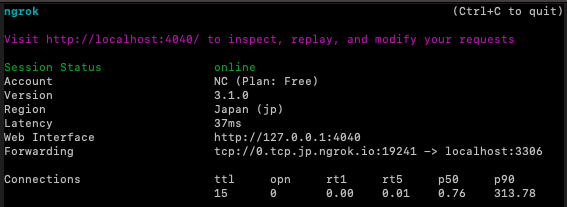

In [ ]:
'''
import pymysql

# 第一步：跟資料庫連線
link = pymysql.connect(
host='0.tcp.jp.ngrok.io', # Forwarding前段
user='root', # 初始化為root
passwd='', # 初始無密碼
db='2022-08-12', # 欲連線的資料庫名稱
charset='utf8',
port=19241, # Forwarding後段
)

# 第二步：取得操作變數
cur = link.cursor() # 感覺多餘的一步ＸＤ

cur.execute() # 下SQL指令
link.commit() # 執行新增、刪除或修改的必要指令

# 第三步：關閉連線
link.close() # 與MySQL的連線有上限取完就關掉
'''

<bound method Connection.close of <pymysql.connections.Connection object at 0x7f6978534e50>>

直接 insert into 來新增一筆資料！

In [3]:
import pymysql

link = pymysql.connect(
host='0.tcp.jp.ngrok.io',
user='root', 
passwd='', 
db='2022-08-12',
charset='utf8',
port=19241,
)

cur = link.cursor()

cur.execute("INSERT INTO `news`(`src`,`title`,`description`,`create_date`) VALUES('聯合報','「GOLF學用接軌聯盟」結合企業 與大專院校推學分合作','線上直播對談由緯育TibaMe擔任引言人，邀請主講企業：104人力銀行在10月29日會針對個人職涯發展，聊聊「新世代人才，未來關鍵學習力」；敏捷指標企業...','2021-10-07')")
link.commit()

link.close()

<bound method Connection.close of <pymysql.connections.Connection object at 0x7fd605712910>>

新增資料：LIST 串列格式

In [4]:
import pymysql

link = pymysql.connect(
host='0.tcp.jp.ngrok.io',
user='root',
passwd='',
db='2022-08-12',
charset='utf8',
port=19241,
)

cur = link.cursor()

# 用lsit資料
data = ["工商時報","新冠疫情來襲 再掀企業線上學習熱潮","緯育TibaMe長期致力於企業培訓服務，聚焦在領導力、人工智慧、雲端應用、行動技術、數位商務、區塊鏈及科技管理等領域的數位力發展，提供多達130門扣合...","2020-02-26"]
cur.execute("INSERT INTO `news`(`src`,`title`,`description`,`create_date`) VALUES(%s,%s,%s,%s)",data)
link.commit()

link.close()

<bound method Connection.close of <pymysql.connections.Connection object at 0x7fd6056d2890>>

新增資料：DICT 字典格式

In [5]:
import pymysql

link = pymysql.connect(
host='0.tcp.jp.ngrok.io',
user='root',
passwd='',
db='2022-08-12',
charset='utf8',
port=19241,
)

cur = link.cursor()

# 用dict資料
data = {
    "s":"科技新報",
    "t":"集結六年數位轉型創新力，創建「贏者全拿」致勝商模 ...",
    "d":"其中，緯育（TibaMe）是專門培訓企業數位化人才的線上學習平台，其提供的學習領域涵蓋ICT、語文及管理三大部分。在ICT 方面，85% 課程皆與外部老師...",
    "c":"2021-09-01"
}
cur.execute("INSERT INTO `news`(`src`,`title`,`description`,`create_date`) VALUES(%(s)s,%(t)s,%(d)s,%(c)s)",data)
link.commit()

link.close()

<bound method Connection.close of <pymysql.connections.Connection object at 0x7fd6056bf590>>

利用python帶入變數 => 讓使用者自行輸入新增資料！

---

* 新聞來源：Meet創業小聚
* 新聞標題：從ICT專長到新創合作，緯創資通的企業內部創新關鍵IIC如何
* 新聞內容：... 教育科技，成立專為培育產業人才的線上AI 學習平台——緯育TibaMe。此外，緯創也和政府單位合作，藉由5G AIoT 智慧科技，協助打造「智慧城市」。
* 發佈日期：2021-08-09

In [6]:
import pymysql

link = pymysql.connect(
host='0.tcp.jp.ngrok.io',
user='root',
passwd='',
db='2022-08-12',
charset='utf8',
port=19241,
)

cur = link.cursor()
data = {
    "s":input("新聞來源："),
    "t":input("新聞標題："),
    "d":input("新聞內容："),
    "c":input("發佈日期：")
}
cur.execute("INSERT INTO `news`(`src`,`title`,`description`,`create_date`) VALUES(%(s)s,%(t)s,%(d)s,%(c)s)",data)
link.commit()

link.close()

新聞來源：Meet創業小聚
新聞標題：從ICT專長到新創合作，緯創資通的企業內部創新關鍵IIC如何
新聞內容：... 教育科技，成立專為培育產業人才的線上AI 學習平台——緯育TibaMe。此外，緯創也和政府單位合作，藉由5G AIoT 智慧科技，協助打造「智慧城市」。
發佈日期：2021-08-09


<bound method Connection.close of <pymysql.connections.Connection object at 0x7fd6056f0b50>>

查詢指令不需 link.commit() -> 但要配合其他指令！

In [17]:
import pymysql

link = pymysql.connect(
host='0.tcp.jp.ngrok.io',
user='root',
passwd='',
db='2022-08-12',
charset='utf8',
port=19241,
)

cur = link.cursor()
cur.execute("SELECT * FROM `news`")

d = cur.fetchone() # 一次抓一筆，逐列呈現資料，不能在fetchall()後使用。
print(d[0],d[1],d[4])
d = cur.fetchone()
print(d[0],d[4],d[3])
d = cur.fetchone() 
print(d[0],d[1],d[4])

ret = cur.fetchall() # 把（剩下）所有資料一次抓回來，TUPLE格式，可讀取不能存入！
for d in ret:
    print(d[0],d[4],d[2])

print('資料總筆數：', cur.rowcount) # 計算資料取得總數，注意它是屬性非函數

link.close()

1 經濟日報 2021-11-12
2 2022-01-20 緯創（3231）旗下教育科技服務平台緯育TibaMe，提供混成教學培訓與學習平台，以顧問式導入及教練式輔導的雲端培訓服務，提供企業人才策略發展解決方案...
3 奇摩股市 2022-04-16
4 2021-01-15 緯育TibaMe攜六企業辦Beyond數位力年會
5 2020-10-30 幫IC設計大咖2年完訓700名AI工程師！緯創孵化5年打造台灣
6 2021-05-19 《電腦設備》線上學習爆量 緯創旗下緯育今年營收拚翻倍
7 2021-10-07 「GOLF學用接軌聯盟」結合企業 與大專院校推學分合作
8 2020-02-26 新冠疫情來襲 再掀企業線上學習熱潮
9 2021-09-01 集結六年數位轉型創新力，創建「贏者全拿」致勝商模 ...
10 2021-08-09 從ICT專長到新創合作，緯創資通的企業內部創新關鍵IIC如何
11 2021-10-07 「GOLF學用接軌聯盟」結合企業 與大專院校推學分合作
12 2020-02-26 新冠疫情來襲 再掀企業線上學習熱潮
13 2021-09-01 集結六年數位轉型創新力，創建「贏者全拿」致勝商模 ...
14 2021-08-09 從ICT專長到新創合作，緯創資通的企業內部創新關鍵IIC如何
資料總筆數： 14
